# IMPORTING LIBERARIES

In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# IMPORTING DATA

In [2]:
data=pd.read_csv("Solar Power Plant Data.csv")

# DATA UNDERSTANDING AND CLEANING

In [3]:
data.head()

Date-Hour(NMT)  WindSpeed  Sunshine  AirPressure  Radiation  \
0  01.01.2017-00:00        0.6         0       1003.8       -7.4   
1  01.01.2017-01:00        1.7         0       1003.5       -7.4   
2  01.01.2017-02:00        0.6         0       1003.4       -6.7   
3  01.01.2017-03:00        2.4         0       1003.3       -7.2   
4  01.01.2017-04:00        4.0         0       1003.1       -6.3   

   AirTemperature  RelativeAirHumidity  SystemProduction  
0             0.1                   97               0.0  
1            -0.2                   98               0.0  
2            -1.2                   99               0.0  
3            -1.3                   99               0.0  
4             3.6                   67               0.0

In [4]:
data.columns[1:-1]

Index(['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature',
       'RelativeAirHumidity'],
      dtype='object')

In [5]:
data.describe()

WindSpeed     Sunshine  AirPressure    Radiation  AirTemperature  \
count  8760.000000  8760.000000  8760.000000  8760.000000     8760.000000   
mean      2.639823    11.180479  1010.361781    97.538493        6.978893   
std       1.628754    21.171295    12.793971   182.336029        7.604266   
min       0.000000     0.000000   965.900000    -9.300000      -12.400000   
25%       1.400000     0.000000  1002.800000    -6.200000        0.500000   
50%       2.300000     0.000000  1011.000000    -1.400000        6.400000   
75%       3.600000     7.000000  1018.200000   115.600000       13.400000   
max      10.900000    60.000000  1047.300000   899.700000       27.100000   

       RelativeAirHumidity  SystemProduction  
count          8760.000000       8760.000000  
mean             76.719406        684.746071  
std              19.278996       1487.454665  
min              13.000000          0.000000  
25%              64.000000          0.000000  
50%              82.000000          0.000000  
75%              93.000000        464.249950  
max             100.000000       7701.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [7]:
data.isnull().sum()

Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.shape

(8760, 8)

In [10]:
print(f"Range of Datetime column: ({data.index.min()}) to ({data.index.max()})")

Range of Datetime column: (0) to (8759)


In [11]:
data[data["Radiation"] < 0].shape

(4464, 8)

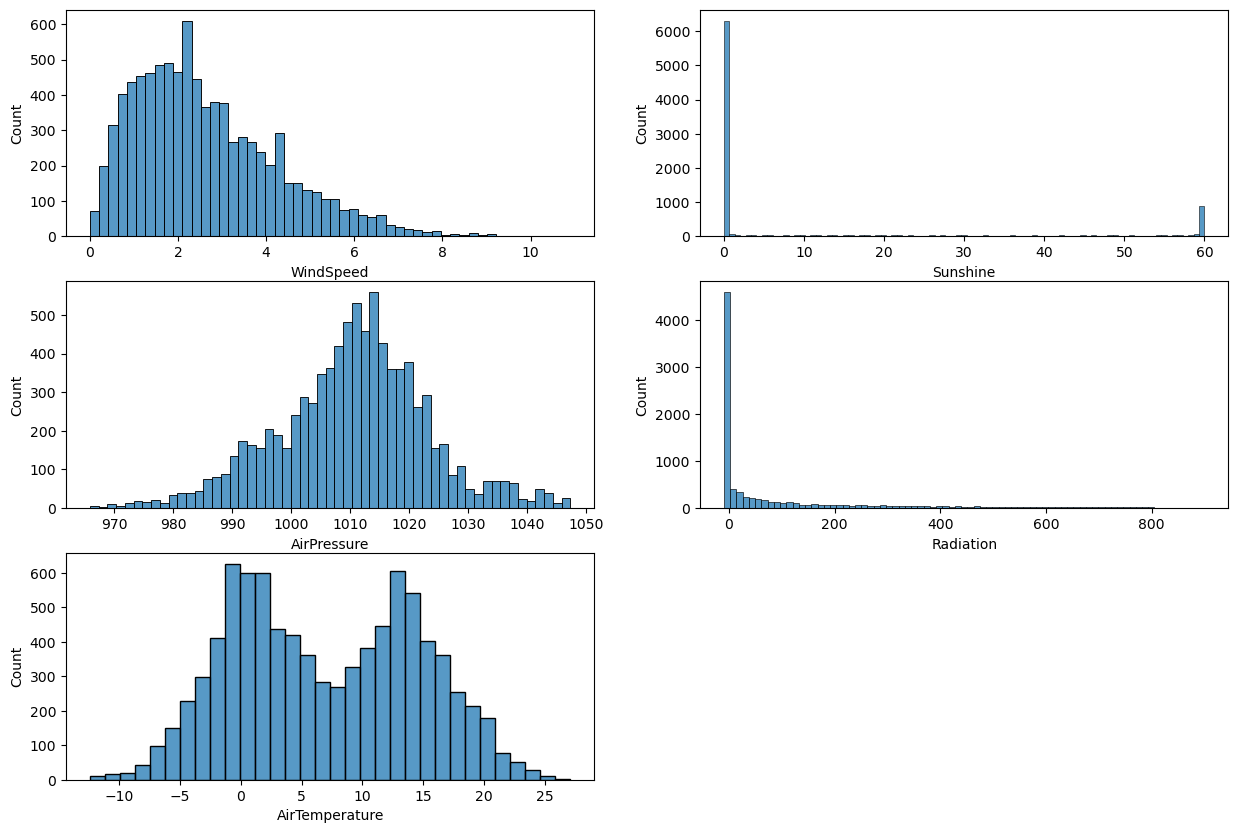

In [12]:
i=1
plt.figure(figsize=(15,10))
for col in data.iloc[:,1:6].columns:
    plt.subplot(3,2,i)
    sns.histplot(data[col])
    i=i+1

In [13]:
for col in data.iloc[:, 1:6].columns:
    print(f"\nSummary for {col}:\n")
    print(data[col].describe())



Summary for WindSpeed:

count    8760.000000
mean        2.639823
std         1.628754
min         0.000000
25%         1.400000
50%         2.300000
75%         3.600000
max        10.900000
Name: WindSpeed, dtype: float64

Summary for Sunshine:

count    8760.000000
mean       11.180479
std        21.171295
min         0.000000
25%         0.000000
50%         0.000000
75%         7.000000
max        60.000000
Name: Sunshine, dtype: float64

Summary for AirPressure:

count    8760.000000
mean     1010.361781
std        12.793971
min       965.900000
25%      1002.800000
50%      1011.000000
75%      1018.200000
max      1047.300000
Name: AirPressure, dtype: float64

Summary for Radiation:

count    8760.000000
mean       97.538493
std       182.336029
min        -9.300000
25%        -6.200000
50%        -1.400000
75%       115.600000
max       899.700000
Name: Radiation, dtype: float64

Summary for AirTemperature:

count    8760.000000
mean        6.978893
std         7.604266
min  

C:\Users\nabeelm\AppData\Local\Temp\ipykernel_18672\3992684830.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


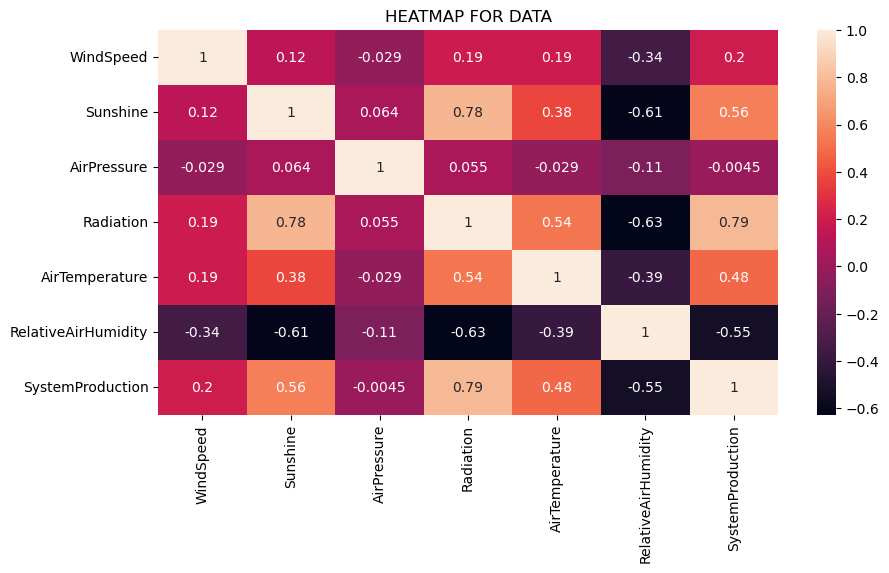

In [14]:
plt.figure(figsize=(10,5))

sns.heatmap(data.corr(),annot=True)
plt.title("HEATMAP FOR DATA")
plt.show()

In [15]:
data.columns=['date','windspeed','sunshine','airpressure','radiation','temp','humidity','production']

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

features = ['date', 'windspeed', 'sunshine', 'airpressure', 'radiation', 'temp', 'humidity', 'production']

fig = make_subplots(rows=len(features), cols=1, subplot_titles=[f"Box plot of {f}" for f in features])

for i, f in enumerate(features, start=1):
    box = go.Box(x=data[f], name=f"Box plot of {f}", notched=True, hoverinfo="y+name")
    fig.add_trace(box, row=i, col=1)

fig.update_layout(height=1000, width=800, title_text="Box Plots for Various Features")
fig.show()


In [17]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1

print(IQR)

windspeed        2.20000
sunshine         7.00000
airpressure     15.40000
radiation      121.80000
temp            12.90000
humidity        29.00000
production     464.24995
dtype: float64


C:\Users\nabeelm\AppData\Local\Temp\ipykernel_18672\3616608653.py:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\nabeelm\AppData\Local\Temp\ipykernel_18672\3616608653.py:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [18]:
features = ['windspeed', 'sunshine', 'airpressure', 'radiation', 'temp', 'humidity', 'production']
for _,f in enumerate(features):
    print(f"Percentage of Outliers for {f}:")
    print(
        round((len(data[(data[f] < (q1[_]- IQR[_]*1.5)) | (data[f] > (q3[0] + IQR[_]*1.5))]) / len(data))*100,2)
    )

Percentage of Outliers for windspeed:
1.46
Percentage of Outliers for sunshine:
22.5
Percentage of Outliers for airpressure:
100.0
Percentage of Outliers for radiation:
19.49
Percentage of Outliers for temp:
0.55
Percentage of Outliers for humidity:
89.37
Percentage of Outliers for production:
21.31


In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# set the independent variables to X
X_vif = data[features]
X_vif = sm.add_constant(X_vif)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(features)+1)]
print(vif_data)

       feature          VIF
0        const  6622.032445
1    windspeed     1.161523
2     sunshine     2.813272
3  airpressure     1.030335
4    radiation     4.958600
5         temp     1.451188
6     humidity     2.028122
7   production     2.748416


In [20]:
data.index=pd.to_datetime(data.date)

In [21]:
data['date']=pd.to_datetime(data['date'])

In [22]:
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.day
data['hour']=data['date'].dt.hour

In [23]:
data.head()

date  windspeed  sunshine  airpressure  \
date                                                                        
2017-01-01 00:00:00 2017-01-01 00:00:00        0.6         0       1003.8   
2017-01-01 01:00:00 2017-01-01 01:00:00        1.7         0       1003.5   
2017-01-01 02:00:00 2017-01-01 02:00:00        0.6         0       1003.4   
2017-01-01 03:00:00 2017-01-01 03:00:00        2.4         0       1003.3   
2017-01-01 04:00:00 2017-01-01 04:00:00        4.0         0       1003.1   

                     radiation  temp  humidity  production  year  month  day  \
date                                                                           
2017-01-01 00:00:00       -7.4   0.1        97         0.0  2017      1    1   
2017-01-01 01:00:00       -7.4  -0.2        98         0.0  2017      1    1   
2017-01-01 02:00:00       -6.7  -1.2        99         0.0  2017      1    1   
2017-01-01 03:00:00       -7.2  -1.3        99         0.0  2017      1    1   
2017-01-01 04:00:00       -6.3   3.6        67         0.0  2017      1    1   

                     hour  
date                       
2017-01-01 00:00:00     0  
2017-01-01 01:00:00     1  
2017-01-01 02:00:00     2  
2017-01-01 03:00:00     3  
2017-01-01 04:00:00     4

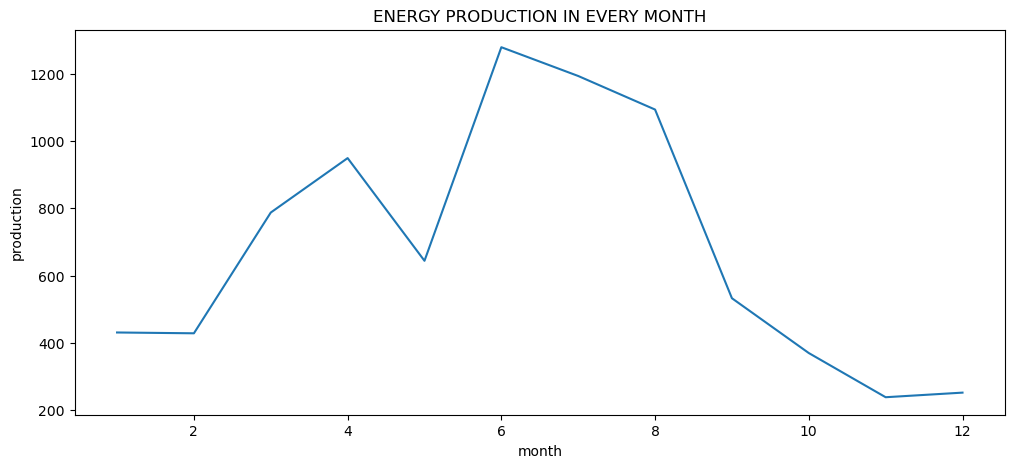

In [24]:
plt.figure(figsize=(12,5))
sns.lineplot(data.groupby(by='month')['production'].mean())
plt.title("ENERGY PRODUCTION IN EVERY MONTH")
plt.show()

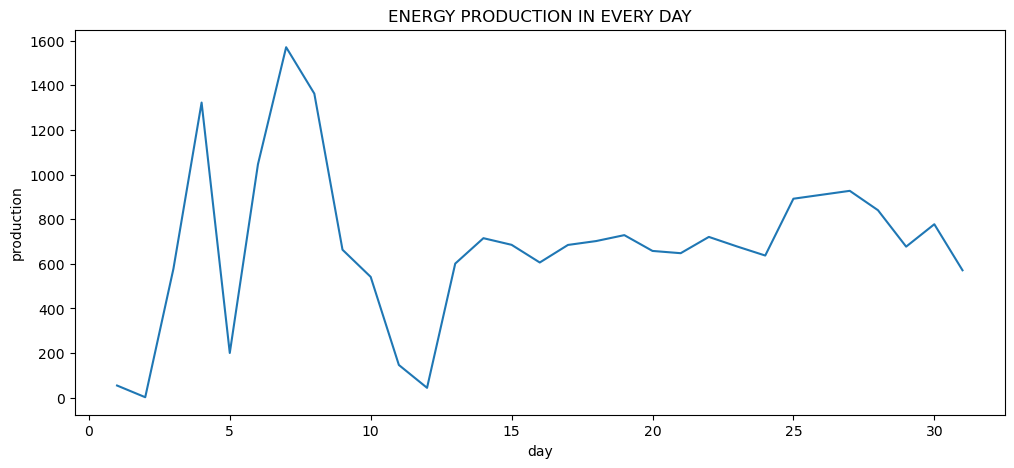

In [25]:
plt.figure(figsize=(12,5))
sns.lineplot(data.groupby(by='day')['production'].mean())
plt.title("ENERGY PRODUCTION IN EVERY DAY")
plt.show()

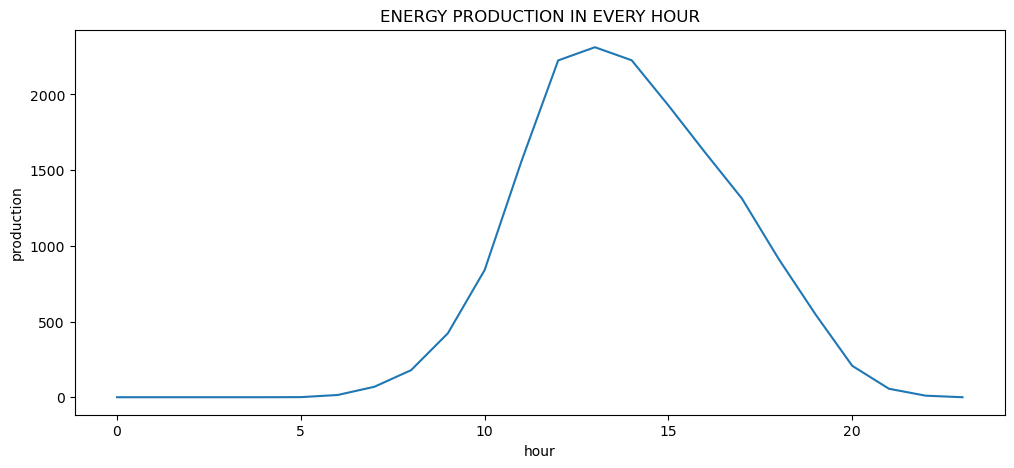

In [26]:
plt.figure(figsize=(12,5))
sns.lineplot(data.groupby(by='hour')['production'].mean())
plt.title("ENERGY PRODUCTION IN EVERY HOUR")
plt.show()

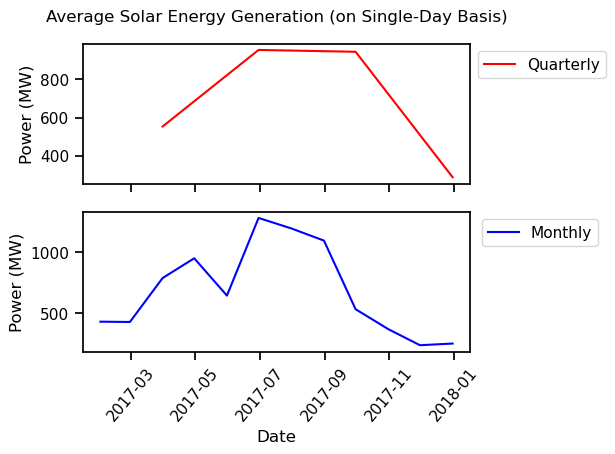

In [27]:

sns.set_context("notebook")
fig , [ax1, ax2] = plt.subplots(2, 1, figsize=(5, 4), sharex=True); # get the subplots

Q = data.production.resample("1Q").mean()
M = data.production.resample("1M").mean()

sns.lineplot(x=Q.index, y=Q.values, color="r", ax=ax1, label="Quarterly")
sns.lineplot(x=M.index, y=M.values, color="b", ax=ax2, label='Monthly')

# set the title and labels
ax1.set_title("Average Solar Energy Generation (on Single-Day Basis)", y=1.1);
ax1.legend(bbox_to_anchor=(1, 1));  # set the legend to be outside the grid
ax2.legend(bbox_to_anchor=(1.35, 1));  # set the legend to be outside the grid
plt.xticks(rotation=50);
ax1.set_ylabel("Power (MW)");
ax2.set_ylabel("Power (MW)");
plt.xlabel("Date");  # set the shaped

C:\Users\nabeelm\AppData\Local\Temp\ipykernel_18672\4038186065.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



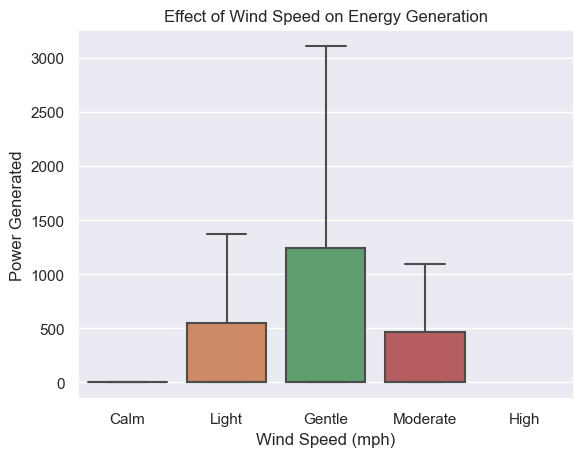

In [28]:
sns.set()
tmp_df = data[["windspeed", "production"]]  # create a temporary data frame
tmp_df.loc[:, "windspeed"] = pd.cut(tmp_df.windspeed,
                                    bins=[-np.inf, 1, 4, 7, 12, np.inf],  # set bins for a total of 5 labels
                                    labels=['Calm', 'Light', 'Gentle', 'Moderate', 'High']) # set the labels names

sns.boxplot(data=tmp_df,
            x="windspeed",
            y="production",
            sym="");  # remove the outliers

# set the labels and title
plt.title("Effect of Wind Speed on Energy Generation");
plt.xlabel("Wind Speed (mph)");
plt.ylabel("Power Generated");

C:\Users\nabeelm\AppData\Local\Temp\ipykernel_18672\2119365408.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



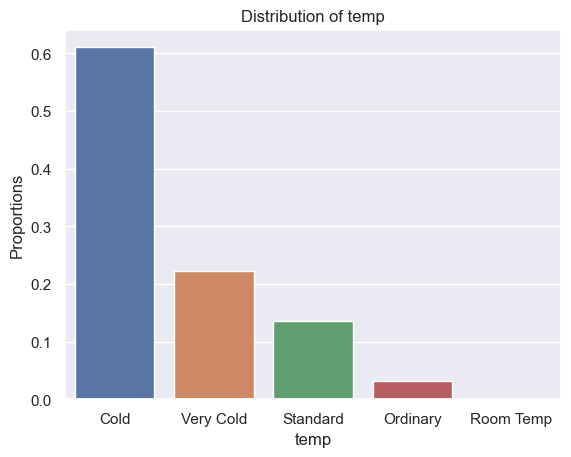

In [29]:
tmp_df.loc[:, "temp"] = pd.cut(data.temp,
                                         bins=[-np.inf, 0, 15, 20, 25, 30, np.inf], # get the bins for a total of 6 labels
                                         labels=['Very Cold', 'Cold', 'Standard', 'Ordinary', 'Room Temp', 'Moderate'])\
                                    .cat.remove_unused_categories() # remove the empty categories

sns.set()  # set the seaborn theme to default
sns.barplot(data=tmp_df.temp.value_counts(normalize=True).to_frame().T)  # plotting a barplot

# set the labels and title
plt.xlabel("temp")
plt.ylabel("Proportions")
plt.title("Distribution of temp");

C:\Users\nabeelm\AppData\Local\Temp\ipykernel_18672\3672317152.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



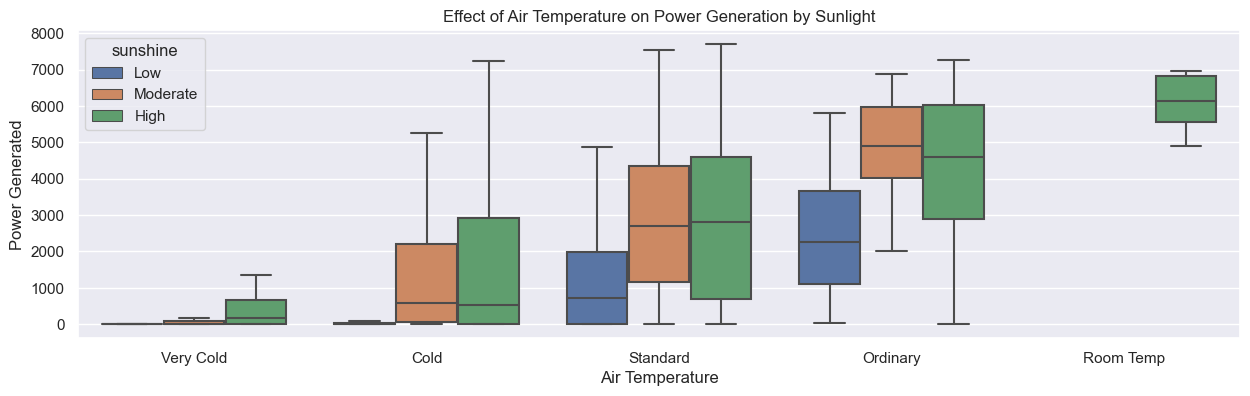

In [30]:
sns.set()
tmp_df.loc[:, "sunshine"] = pd.cut(data.sunshine, bins=3,  # make 3 bins of the data for 3 labels
                                   labels=["Low", "Moderate", "High"]).cat.remove_unused_categories()

plt.subplots(figsize=(15, 4))  # set the figure dimensions
sns.boxplot(data=tmp_df, x="temp", hue="sunshine", y="production", sym="")  # plot a boxplot with no outliers

# set the labels and title
plt.xlabel("Air Temperature")
plt.ylabel("Power Generated")
plt.title("Effect of Air Temperature on Power Generation by Sunlight");

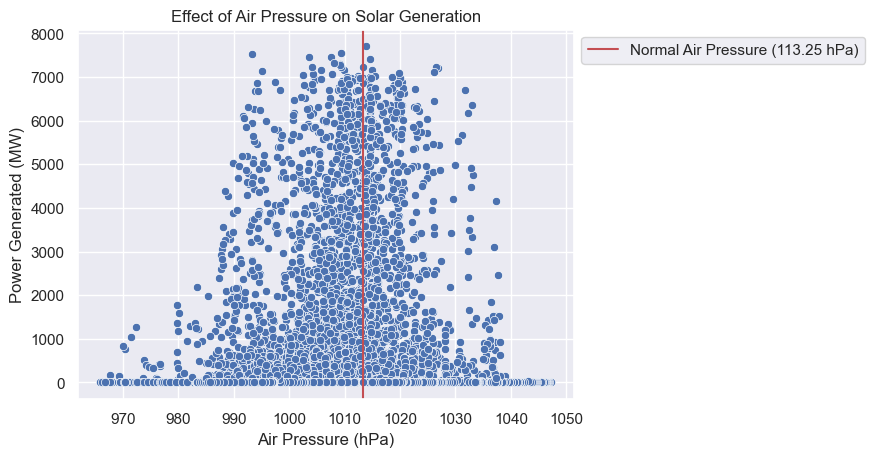

In [31]:
normal_pressure = 1013.25 # the unit is in `hPa`
sns.scatterplot(data=data, x="airpressure", y="production")
plt.axvline(normal_pressure, color="r", label="Normal Air Pressure (113.25 hPa)")
plt.xlabel("Air Pressure (hPa)")
plt.ylabel("Power Generated (MW)")
plt.title("Effect of Air Pressure on Solar Generation")
plt.legend(bbox_to_anchor=(1, 1));

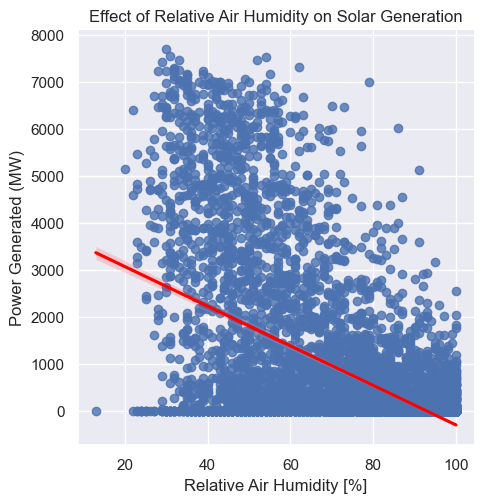

In [32]:
sns.lmplot(data=data, x="humidity", y="production", line_kws={"color": "red"})

# set the labels and title
plt.xlabel("Relative Air Humidity [%]")
plt.ylabel("Power Generated (MW)")
plt.title("Effect of Relative Air Humidity on Solar Generation");

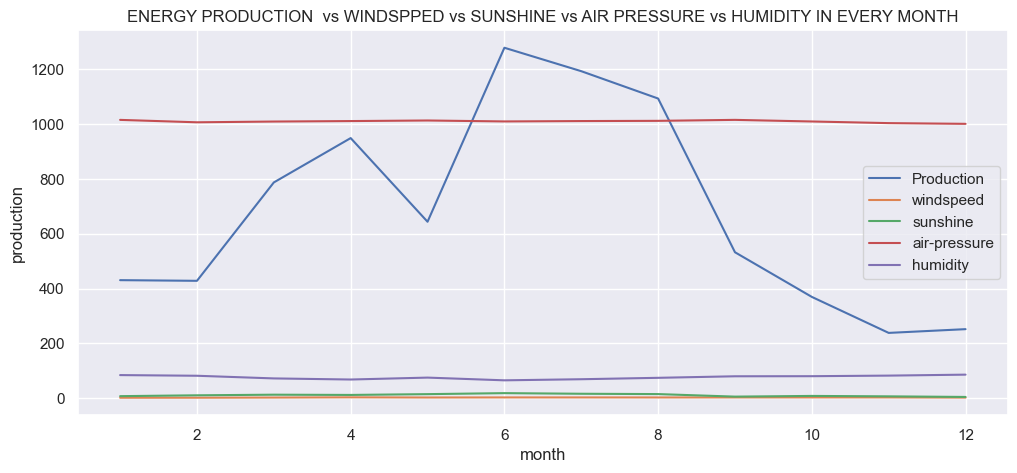

In [33]:
plt.figure(figsize=(12,5))
sns.lineplot(data.groupby(by='month')['production'].mean(),label="Production")
sns.lineplot(data.groupby(by='month')['windspeed'].mean(),label="windspeed")
sns.lineplot(data.groupby(by='month')['sunshine'].mean(),label="sunshine")
sns.lineplot(data.groupby(by='month')['airpressure'].mean(),label="air-pressure")
sns.lineplot(data.groupby(by='month')['humidity'].mean(),label="humidity")
plt.title("ENERGY PRODUCTION  vs WINDSPPED vs SUNSHINE vs AIR PRESSURE vs HUMIDITY IN EVERY MONTH")
plt.legend()
plt.show()

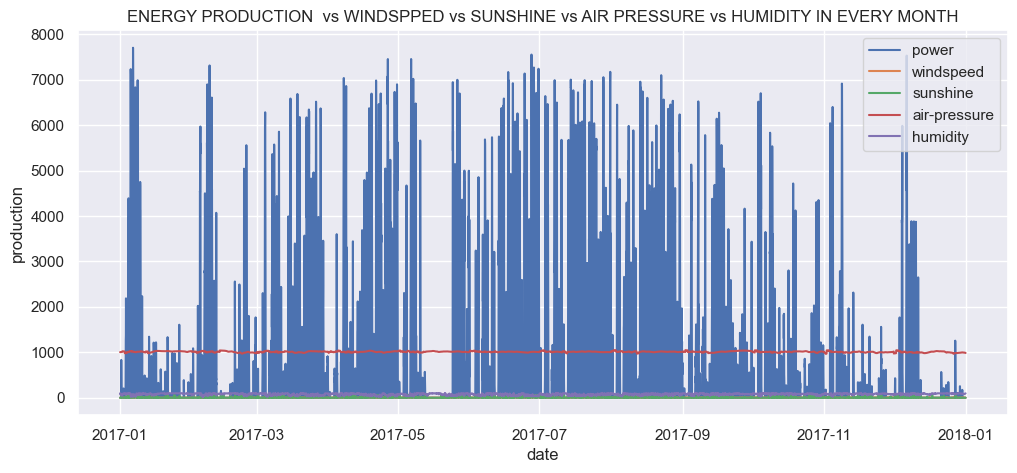

In [34]:
plt.figure(figsize=(12,5))
sns.lineplot(data['production'],label="power")
sns.lineplot(data['windspeed'],label="windspeed")
sns.lineplot(data['sunshine'],label="sunshine")
sns.lineplot(data['airpressure'],label="air-pressure")
sns.lineplot(data['humidity'],label="humidity")
plt.title("ENERGY PRODUCTION  vs WINDSPPED vs SUNSHINE vs AIR PRESSURE vs HUMIDITY IN EVERY MONTH")
plt.legend()
plt.show()

# MODELLING

In [35]:
x=data.drop(['production','date'],axis=1)
y=data[['production']]

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [37]:
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)
x_test.head()

windspeed  sunshine  airpressure  radiation      temp  humidity  year  \
0   0.276561  1.275570     0.320035   2.463022  1.641716 -1.595715   0.0   
1  -0.337707  2.391062     0.073505   1.794296  1.459899 -0.902779   0.0   
2  -1.136254 -0.518917    -0.766237  -0.583457 -0.721900  0.962816   0.0   
3   2.549350 -0.518917    -0.766237  -0.569924 -0.929690  0.483091   0.0   
4   0.522267 -0.518917     0.173658  -0.576690  1.057305  1.016119   0.0   

      month       day      hour  
0 -0.441642  1.046122  0.359672  
1 -0.441642  1.498852 -0.508031  
2 -1.316274  0.367025  1.082758  
3  1.307621  1.272487  1.371993  
4  0.432989  1.385670  1.371993

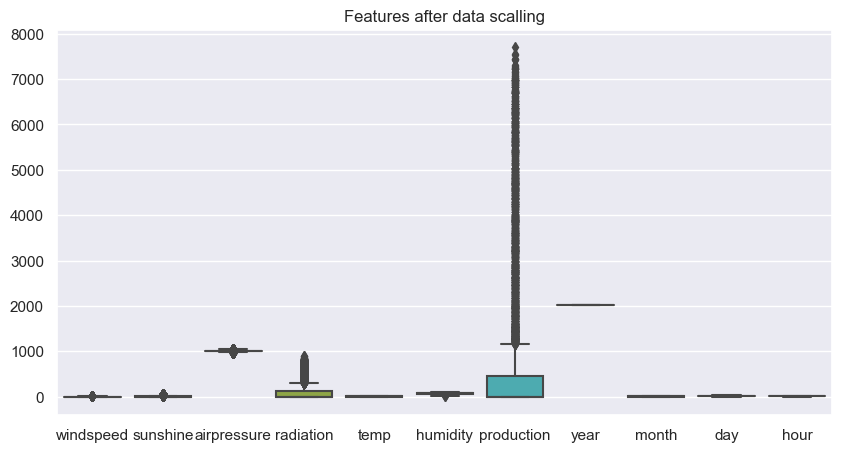

In [38]:
plt.figure(figsize=(10,5))
plt.title("Features after data scalling")
sns.boxplot(data)
plt.show()

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('selector', SelectKBest(k=10)),  # Example feature selection step
    ('model', RandomForestRegressor())
])

# Train Random Forest
rf_pipeline.fit(x_train, y_train)

# Extract Feature Importance
feature_importance = rf_pipeline.named_steps['model'].feature_importances_

# Train and Predict with Random Forest
rf_y_pred = rf_pipeline.predict(x_test)

# Evaluate Random Forest Performance
rf_score = rf_pipeline.score(x_test, y_test)
rf_accuracy = mean_absolute_error(y_test, rf_y_pred)

# Print Random Forest Results
print("Random Forest Results:")
print("Random Forest Score (R²):", rf_score)
print("Random Forest Accuracy (MAE):", rf_accuracy)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [6] are constant.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest Results:
Random Forest Score (R²): 0.8445647212405106
Random Forest Accuracy (MAE): 247.03719781126335


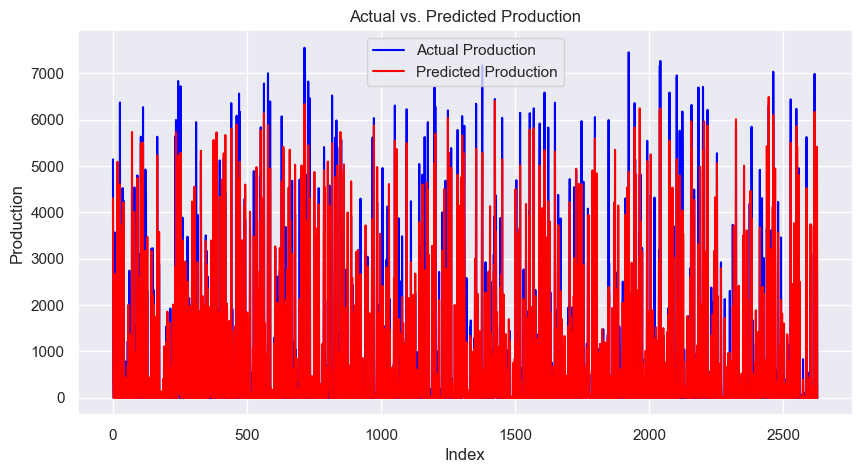

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Production', color='blue')
plt.plot(rf_y_pred, label='Predicted Production', color='red')
plt.title('Actual vs. Predicted Production')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.show()


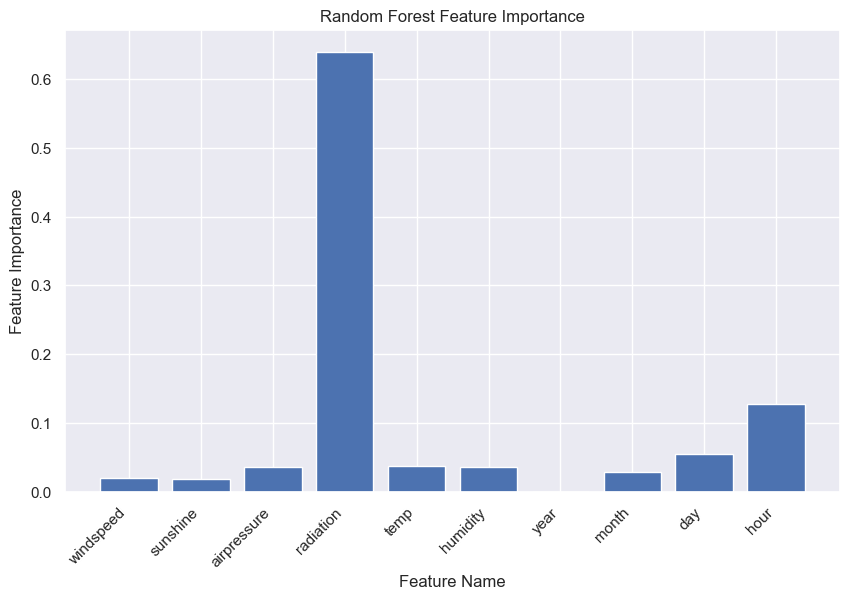

In [42]:
# Assuming your features have names
feature_names = x_train.columns

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), feature_names, rotation=45, ha='right')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


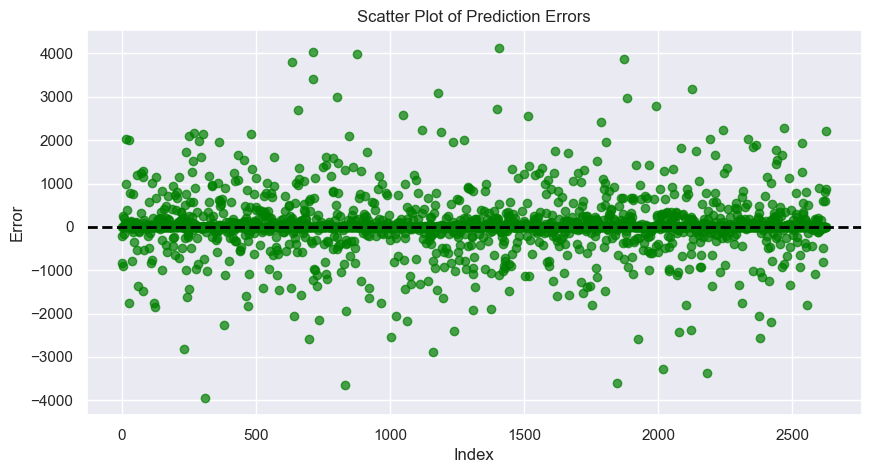

In [43]:
# Scatter Plot for Distribution of Prediction Errors
errors = rf_y_pred - y_test.values.flatten()

plt.figure(figsize=(10, 5))
plt.scatter(range(len(errors)), errors, color='green', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.title('Scatter Plot of Prediction Errors')
plt.xlabel('Index')
plt.ylabel('Error')
plt.show()


## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

# Linear Regression Pipeline
linear_pipeline = Pipeline([
    ('model', LinearRegression())
])

# Train and Predict with Linear Regression
linear_pipeline.fit(x_train, y_train)
linear_y_pred = linear_pipeline.predict(x_test)

# Evaluate Linear Regression Performance
linear_score = linear_pipeline.score(x_test, y_test)
linear_accuracy = mean_absolute_error(y_test, linear_y_pred)

# Print Linear Regression Results
print("\nLinear Regression Results:")
print("Linear Regression Score (R²):", linear_score)
print("Linear Regression Accuracy (MAE):", linear_accuracy)



Linear Regression Results:
Linear Regression Score (R²): 0.6341209019151224
Linear Regression Accuracy (MAE): 477.04095399007235


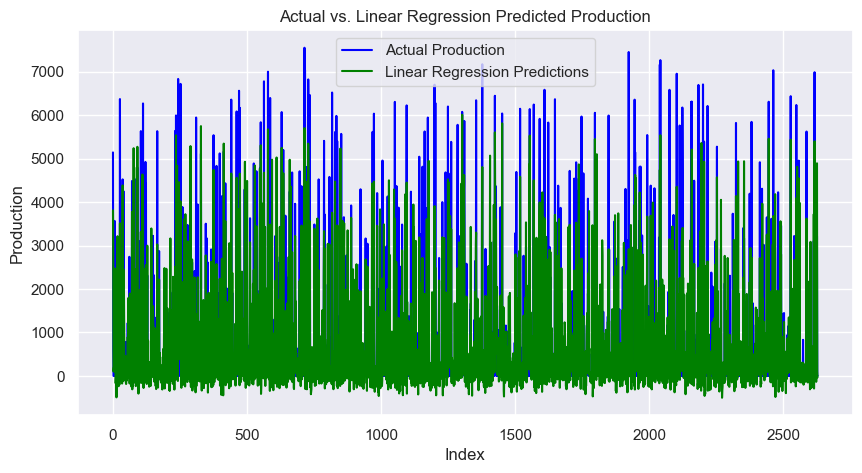

In [45]:
# Visualize Predictions vs. Actuals for Linear Regression
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Production', color='blue')
plt.plot(linear_y_pred, label='Linear Regression Predictions', color='green')
plt.title('Actual vs. Linear Regression Predicted Production')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.show()


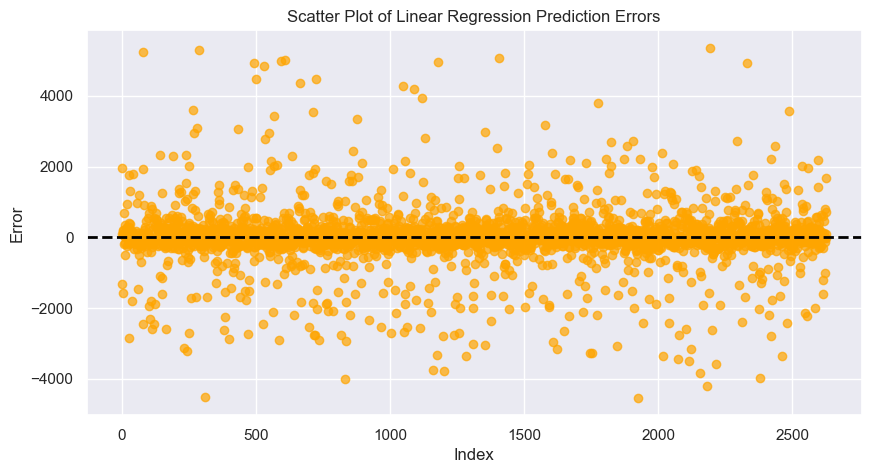

In [47]:
# Error Distribution Plot for Linear Regression
linear_errors = linear_y_pred.flatten() - y_test.values.flatten()

plt.figure(figsize=(10, 5))
plt.scatter(range(len(linear_errors)), linear_errors, color='orange', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.title('Scatter Plot of Linear Regression Prediction Errors')
plt.xlabel('Index')
plt.ylabel('Error')
plt.show()


## Comparing Results

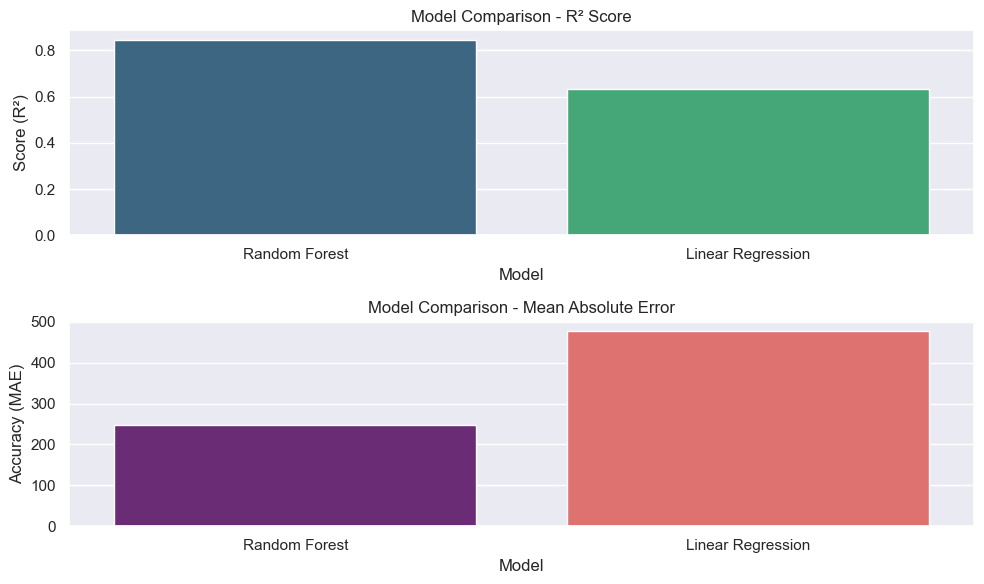

In [48]:
# Results
model_names = ['Random Forest', 'Linear Regression']
scores = [rf_score, linear_score]
accuracies = [rf_accuracy, linear_accuracy]

# Create a DataFrame for better visualization
results_df = pd.DataFrame({'Model': model_names, 'Score (R²)': scores, 'Accuracy (MAE)': accuracies})

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='Score (R²)', data=results_df, palette='viridis')
plt.title('Model Comparison - R² Score')

plt.subplot(2, 1, 2)
sns.barplot(x='Model', y='Accuracy (MAE)', data=results_df, palette='magma')
plt.title('Model Comparison - Mean Absolute Error')

plt.tight_layout()
plt.show()

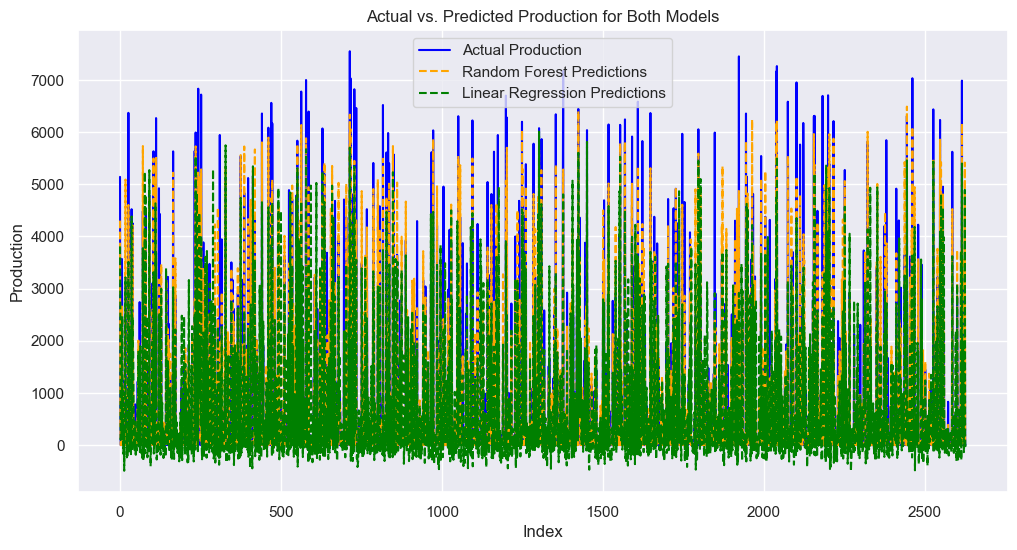

In [50]:
# Visualize Predictions vs. Actuals for Both Models
plt.figure(figsize=(12, 6))

# Actual Production
plt.plot(y_test.values, label='Actual Production', color='blue')

# Random Forest Predictions
plt.plot(rf_y_pred, label='Random Forest Predictions', color='orange', linestyle='--')

# Linear Regression Predictions
plt.plot(linear_y_pred, label='Linear Regression Predictions', color='green', linestyle='--')

plt.title('Actual vs. Predicted Production for Both Models')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.show()